## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import numpy
from keras.models import Sequential
from keras.layers import Dense #Y = Wx+b
from keras.layers import Flatten #converts multidimensional image to a vector
from keras.layers import Activation
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint #for saving models after certain epochs

## Load Dataset

In [2]:
#Read CSV file into a dataframe
df = pd.read_csv("/content/data.csv")

#Copy dataframe to a new variable to avoid any accidental changes in the original data
df_new = df.copy()

#Display the dataframe
display(df_new)

,Unnamed: 0,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Willie Durham,Male,34,185.5,France,104,Judo,2,9,6,5,Consejo Global de Lucha Libre,2008,353
496,496,Winnie Larsen,Female,31,161.5,France,71,"Judo, Karate, Kick-Boxing, MMA",5,4,9,6,World Wrestling Entertainment,2003,74
497,497,Winston Wahl,Male,22,188.5,France,102,Kick-Boxing,3,8,8,7,Consejo Global de Lucha Libre,2021,265
498,498,Yolanda Yamashiro,Female,32,177.0,France,92,Judo,2,5,5,5,Consejo Global de Lucha Libre,2012,499


In [3]:
#Print the type of the dataset
type(df_new)

pandas.core.frame.DataFrame

In [4]:
#Display the number of rows and columns in the dataframe
df_new.shape

(500, 15)

In [5]:
#Display the columns in the dataset
df_new.keys()

Index(['Unnamed: 0', 'name', 'gender', 'age', 'height', 'nationality',
       'weight', 'sports', 'hours_per_day', 'strength', 'agility', 'mental',
       'federation', 'year_start', 'rank'],
      dtype='object')

In [6]:
#Display information about the dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     500 non-null    int64  
 1   name           500 non-null    object 
 2   gender         500 non-null    object 
 3   age            500 non-null    int64  
 4   height         500 non-null    float64
 5   nationality    500 non-null    object 
 6   weight         500 non-null    int64  
 7   sports         500 non-null    object 
 8   hours_per_day  500 non-null    int64  
 9   strength       500 non-null    int64  
 10  agility        500 non-null    int64  
 11  mental         500 non-null    int64  
 12  federation     500 non-null    object 
 13  year_start     500 non-null    int64  
 14  rank           500 non-null    int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 58.7+ KB


In [7]:
#Displays output of describe function and converting values that are displayed from scientific notation to normal numeric values
df_new.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Unnamed: 0,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank
count,500.00000,500.00000,500.00000,500.00000,500.00000,500.00000,500.00000,500.00000,500.00000,500.00000
mean,249.50000,31.15400,174.86400,89.68800,3.06400,6.15200,7.14800,6.73200,2007.13000,250.50000
std,144.48183,5.43851,9.46862,11.08189,1.37539,1.56774,1.45545,1.19793,6.32591,144.48183
min,0.00000,18.00000,152.00000,65.00000,0.00000,2.00000,3.00000,3.00000,1986.00000,1.00000
25%,124.75000,27.00000,167.50000,81.00000,2.00000,5.00000,6.00000,6.00000,2003.00000,125.75000
50%,249.50000,31.00000,174.00000,89.00000,3.00000,6.00000,7.00000,7.00000,2007.00000,250.50000
75%,374.25000,35.00000,181.62500,98.00000,4.00000,7.00000,8.00000,8.00000,2011.00000,375.25000
max,499.00000,53.00000,202.00000,123.00000,8.00000,10.00000,10.00000,10.00000,2021.00000,500.00000


In [8]:
#Check if any variable contains missing values
#It will return TRUE beside the column that contains missing values
df_new.isnull().any(axis=0)

Unnamed: 0       False
name             False
gender           False
age              False
height           False
nationality      False
weight           False
sports           False
hours_per_day    False
strength         False
agility          False
mental           False
federation       False
year_start       False
rank             False
dtype: bool

In [9]:
#Check if there are any duplicated rows
df_new.duplicated().sum()

0

## Prepare new dataset

In [10]:
#Remove Unnamed: 0 and name columns
#Unnamed: 0 is an ID column that uniquely identifies a record
#name column is also an unique identifier. Some might argue that name can be useful in predicting gender but some names can be gender neutral and it will be tough to train a machine on this

df_new = df_new.drop(columns=['Unnamed: 0', 'name'])
display(df_new)

,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Male,34,185.5,France,104,Judo,2,9,6,5,Consejo Global de Lucha Libre,2008,353
496,Female,31,161.5,France,71,"Judo, Karate, Kick-Boxing, MMA",5,4,9,6,World Wrestling Entertainment,2003,74
497,Male,22,188.5,France,102,Kick-Boxing,3,8,8,7,Consejo Global de Lucha Libre,2021,265
498,Female,32,177.0,France,92,Judo,2,5,5,5,Consejo Global de Lucha Libre,2012,499


In [11]:
#Encode categorical variables (gender, nationality, sports, federation)

#Retaining the names of the gender
df_new_gender_values = list(df_new['gender'].unique())
print(df_new_gender_values)
#Converting type of columns to category
df_new['gender'] = df_new['gender'].astype('category')
#Assigning numerical values to gender and replacing the non-numerical values
df_new['gender'] = df_new['gender'].cat.codes


#Retaining the names of the nationality
df_new_nationality_values = list(df_new['nationality'].unique())
print(df_new_nationality_values)
#Converting type of columns to category
df_new['nationality'] = df_new['nationality'].astype('category')
#Assigning numerical values to gender and replacing the non-numerical values
df_new['nationality'] = df_new['nationality'].cat.codes


#Retaining the names of the sports
boxing = []
mma = []
judo = []
karate = []
kick = []
for sports in df_new['sports']:
    sports = sports.replace(',', ' ')
    sports = sports.split()
    boxing.append(1 if "Boxing" in sports else 0)
    mma.append(1 if "MMA" in sports else 0)
    judo.append(1 if "Judo" in sports else 0)
    karate.append(1 if "Karate" in sports else 0)
    kick.append(1 if "Kick-Boxing" in sports else 0)
df_new["Boxing"] = boxing
df_new["MMA"] = mma
df_new["Judo"] = judo
df_new["Karate"] = karate
df_new["Kick-Boxing"] = kick


#Retaining the names of the sports
df_new_federation_values = list(df_new['federation'].unique())
print(df_new_federation_values)
#Converting type of columns to category
df_new['federation'] = df_new['federation'].astype('category')
#Assigning numerical values to gender and replacing the non-numerical values
df_new['federation'] = df_new['federation'].cat.codes


df_new = df_new.drop(columns=['sports'])
display(df_new)

['Female', 'Male']
['England', 'Japan', 'USA', 'France', 'Egypt', 'Australia', 'Argentina', 'India']
['Fight Zone Wrestling', 'World Wrestling Entertainment', 'Consejo Global de Lucha Libre']


,gender,age,height,nationality,weight,hours_per_day,strength,agility,mental,federation,year_start,rank,Boxing,MMA,Judo,Karate,Kick-Boxing
0,0,41,165.0,3,82,3,7,8,7,1,1989,42,1,1,0,0,0
1,1,36,185.0,6,100,0,8,5,9,2,2006,161,0,0,1,0,0
2,1,29,178.5,6,93,4,8,8,7,2,2012,153,0,0,0,1,0
3,1,39,187.5,6,107,3,7,6,8,1,2003,252,0,0,1,0,0
4,0,29,158.0,7,72,1,5,7,7,0,2012,360,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,34,185.5,4,104,2,9,6,5,0,2008,353,0,0,1,0,0
496,0,31,161.5,4,71,5,4,9,6,2,2003,74,0,1,1,1,1
497,1,22,188.5,4,102,3,8,8,7,0,2021,265,0,0,0,0,1
498,0,32,177.0,4,92,2,5,5,5,0,2012,499,0,0,1,0,0


## Perform train-test split and plot EDA plot

In [12]:
#Get independent variables for dataset X
x = df_new[['age','height','nationality','weight','hours_per_day','strength','agility','mental','federation','year_start','rank','Boxing','MMA','Judo','Karate','Kick-Boxing']]

#Get target variable for dataset Y
y = df_new[['gender']]

display(x.head())
display(y.head())

,age,height,nationality,weight,hours_per_day,strength,agility,mental,federation,year_start,rank,Boxing,MMA,Judo,Karate,Kick-Boxing
0,41,165.0,3,82,3,7,8,7,1,1989,42,1,1,0,0,0
1,36,185.0,6,100,0,8,5,9,2,2006,161,0,0,1,0,0
2,29,178.5,6,93,4,8,8,7,2,2012,153,0,0,0,1,0
3,39,187.5,6,107,3,7,6,8,1,2003,252,0,0,1,0,0
4,29,158.0,7,72,1,5,7,7,0,2012,360,0,1,0,0,0


,gender
0,0
1,1
2,1
3,1
4,0


In [13]:
#perform train test split.
from sklearn.model_selection import train_test_split
X_1,X_test,y_1,y_test=train_test_split(x,y,test_size=0.2) #20% for testing
X_train,X_val,y_train,y_val=train_test_split(X_1,y_1,test_size=0.2) #64% for train, 16% for val, 20% test

#doublecheck dimensions of training and testing data
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("Y_train: ",y_train.shape)
print("Y_test: ",y_test.shape)

X_train:  (320, 16)
X_test:  (100, 16)
Y_train:  (320, 1)
Y_test:  (100, 1)


In [14]:
X_train.head()

,age,height,nationality,weight,hours_per_day,strength,agility,mental,federation,year_start,rank,Boxing,MMA,Judo,Karate,Kick-Boxing
394,33,176.0,4,93,3,10,6,6,1,2007,247,0,0,0,1,0
251,29,167.5,1,78,2,6,6,6,0,2006,326,0,1,0,1,0
432,33,182.5,7,98,2,8,7,8,0,2009,66,1,1,0,0,0
179,39,181.5,4,100,3,7,7,8,0,2000,60,1,1,0,0,0
171,31,172.5,2,86,3,6,7,6,2,2007,139,1,1,0,0,0


In [15]:
X_test.head()

,age,height,nationality,weight,hours_per_day,strength,agility,mental,federation,year_start,rank,Boxing,MMA,Judo,Karate,Kick-Boxing
258,37,155.5,1,69,4,4,7,8,0,2003,211,0,1,1,0,1
34,31,171.5,6,89,6,6,10,7,0,2010,49,1,1,1,1,0
342,30,190.0,4,111,6,7,5,8,1,2005,63,1,1,1,1,0
180,32,180.5,4,99,3,7,6,9,1,2009,106,0,1,0,0,0
478,38,169.0,7,84,6,7,10,8,0,2000,5,1,1,0,1,1


In [16]:
y_train.head()

,gender
394,1
251,0
432,1
179,1
171,1


In [17]:
y_test.head()

,gender
258,0
34,0
342,1
180,1
478,0


In [18]:
xa = X_train
xa['gender'] = y_train
xa.head()

,age,height,nationality,weight,hours_per_day,strength,agility,mental,federation,year_start,rank,Boxing,MMA,Judo,Karate,Kick-Boxing,gender
394,33,176.0,4,93,3,10,6,6,1,2007,247,0,0,0,1,0,1
251,29,167.5,1,78,2,6,6,6,0,2006,326,0,1,0,1,0,0
432,33,182.5,7,98,2,8,7,8,0,2009,66,1,1,0,0,0,1
179,39,181.5,4,100,3,7,7,8,0,2000,60,1,1,0,0,0,1
171,31,172.5,2,86,3,6,7,6,2,2007,139,1,1,0,0,0,1


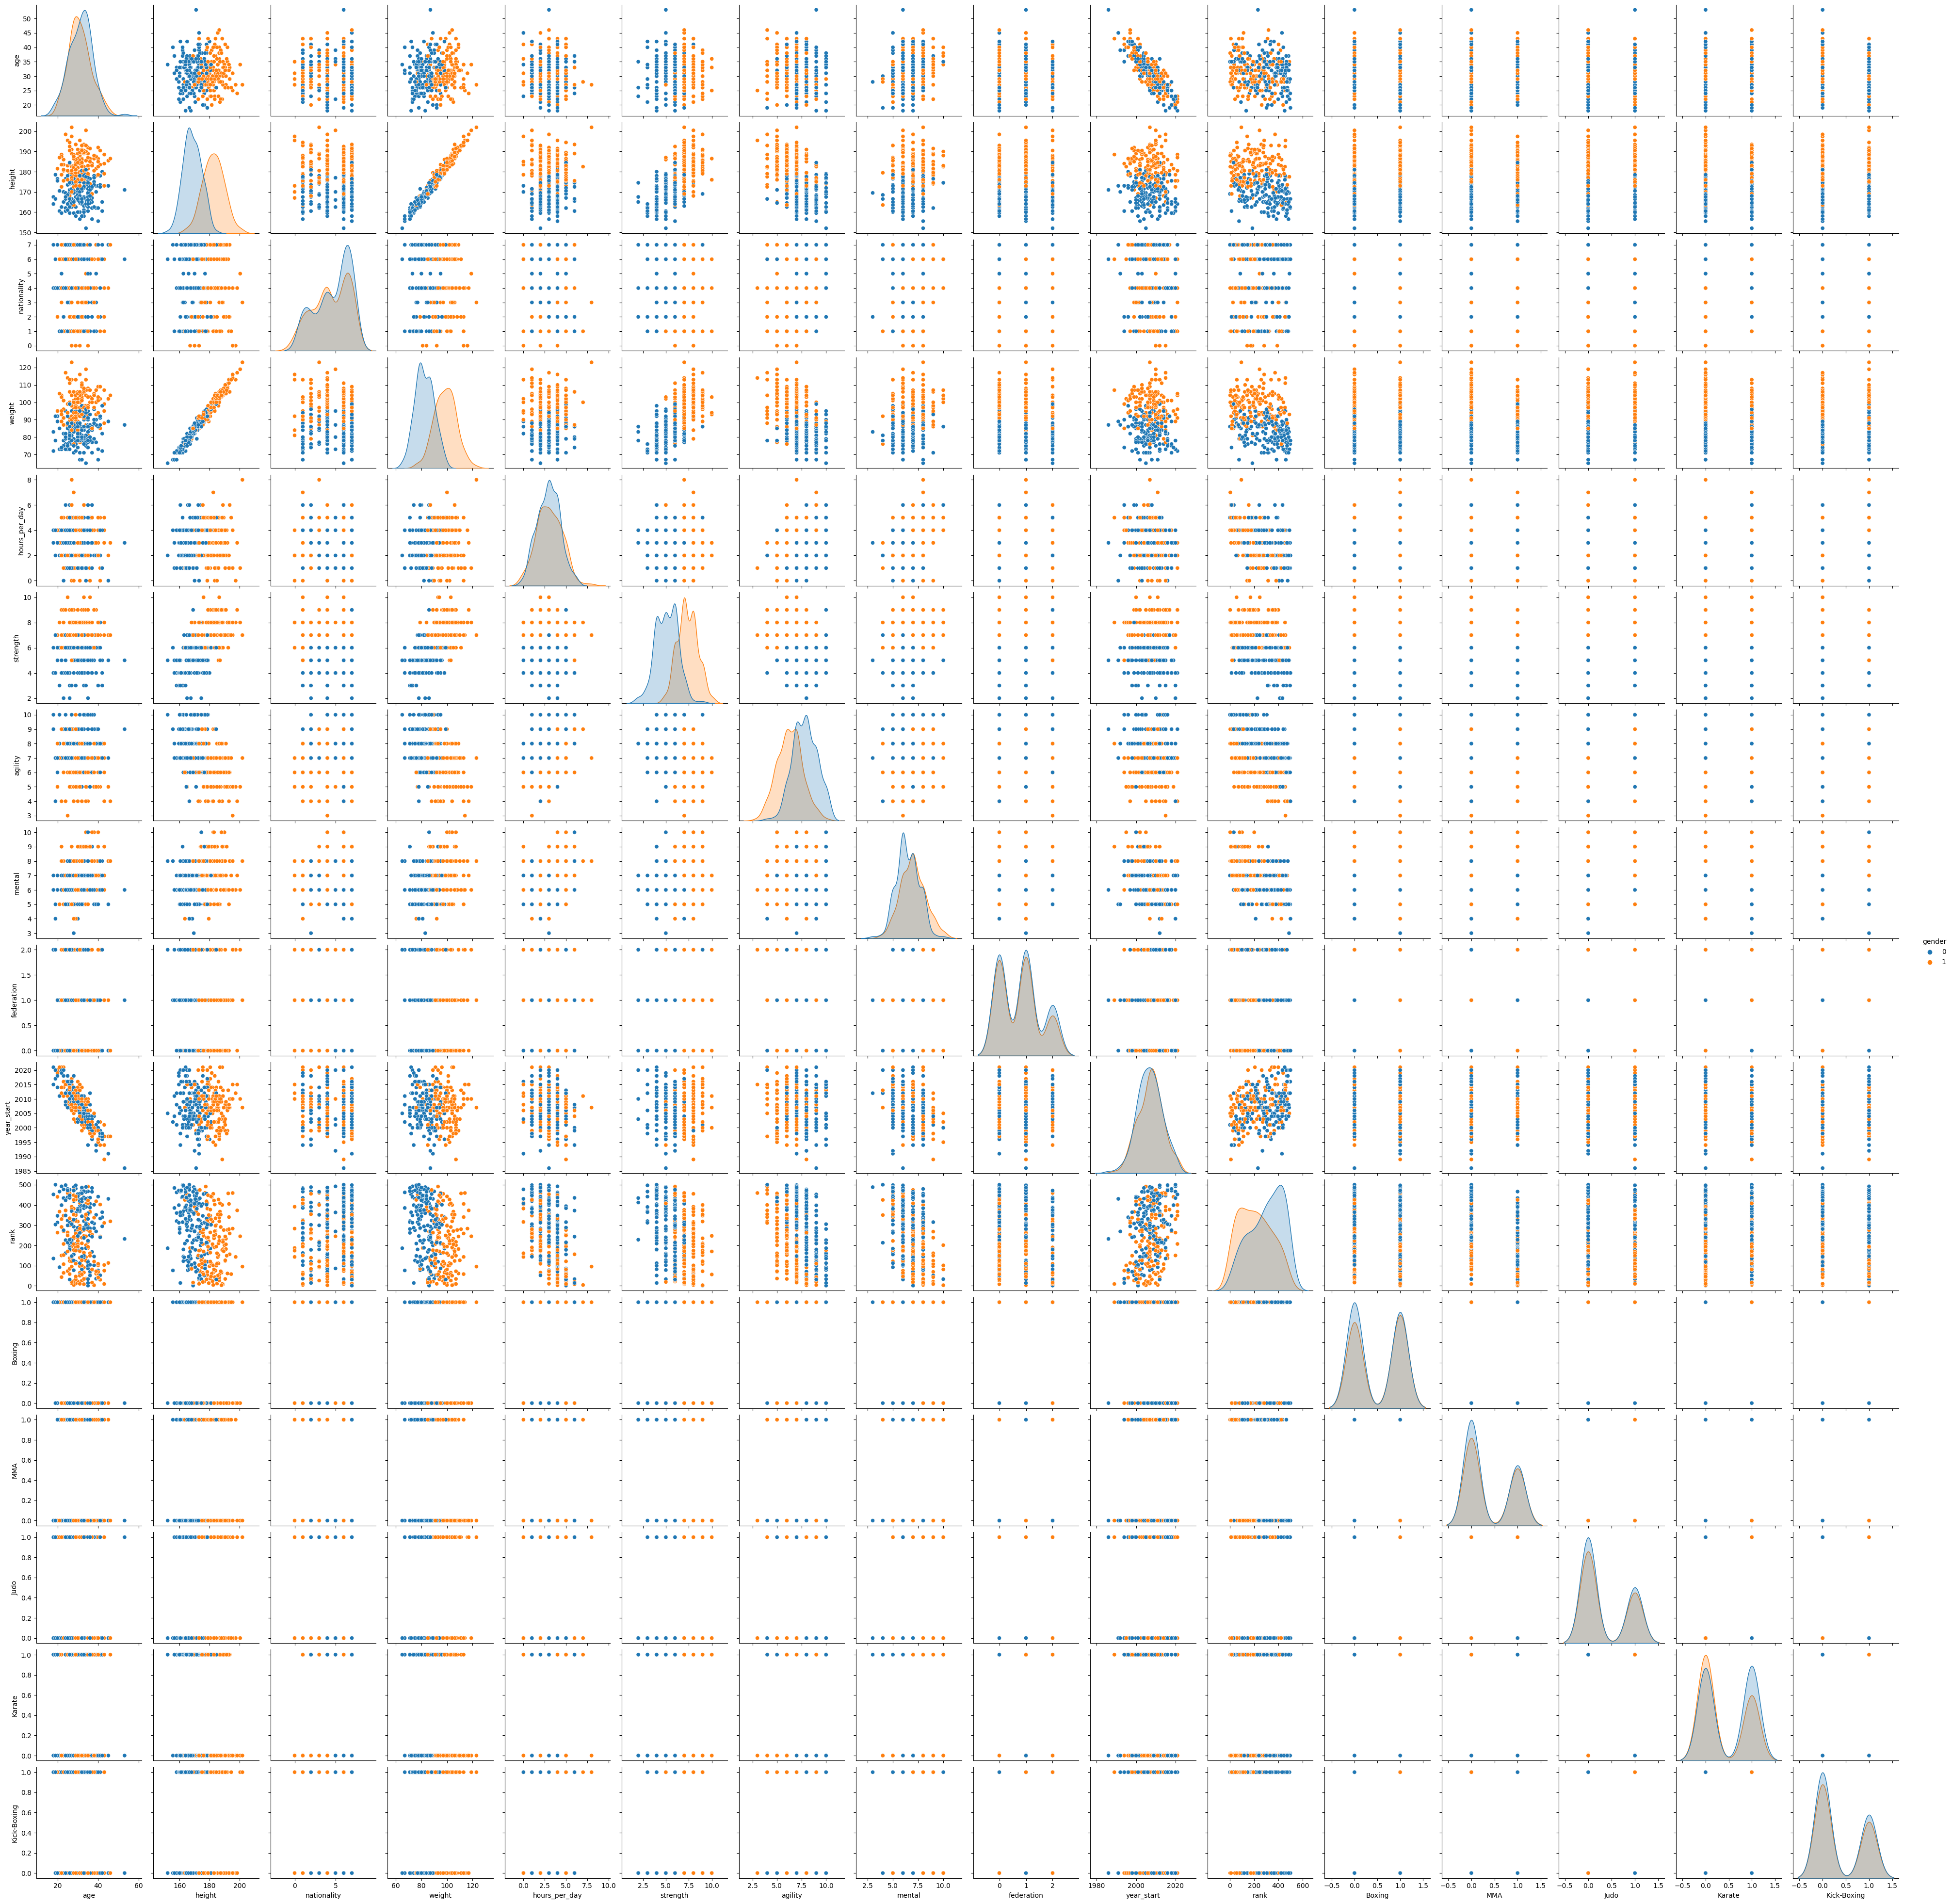

In [19]:
sns.pairplot(xa, hue='gender')

In [20]:
X_train = X_train.drop(['gender'], axis=1)
X_train.head()

,age,height,nationality,weight,hours_per_day,strength,agility,mental,federation,year_start,rank,Boxing,MMA,Judo,Karate,Kick-Boxing
394,33,176.0,4,93,3,10,6,6,1,2007,247,0,0,0,1,0
251,29,167.5,1,78,2,6,6,6,0,2006,326,0,1,0,1,0
432,33,182.5,7,98,2,8,7,8,0,2009,66,1,1,0,0,0
179,39,181.5,4,100,3,7,7,8,0,2000,60,1,1,0,0,0
171,31,172.5,2,86,3,6,7,6,2,2007,139,1,1,0,0,0


## Construct Naïve Bayes algorithm

This is to set a benchmark for the neural network and the goal is for the neural network to have a better performance than the Naïve Bayes algorithm

In [21]:
#Without Scaling

ws = GaussianNB()
ws.fit(X_train,y_train)
Y_pred = ws.predict(X_test)

print(f'Accuracy Score: {(accuracy_score(Y_pred, y_test)*100)}')

Accuracy Score: 90.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
#Classification Report for Naïve Bayes without scaling
predict_yCR = ws.predict(X_test)
cr = classification_report(y_test,predict_yCR)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.93      0.86      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [23]:
#Confusion Matrix for Naïve Bayes without scaling
cmws = confusion_matrix(y_test,predict_yCR)
print(cmws)

[[47  3]
 [ 7 43]]


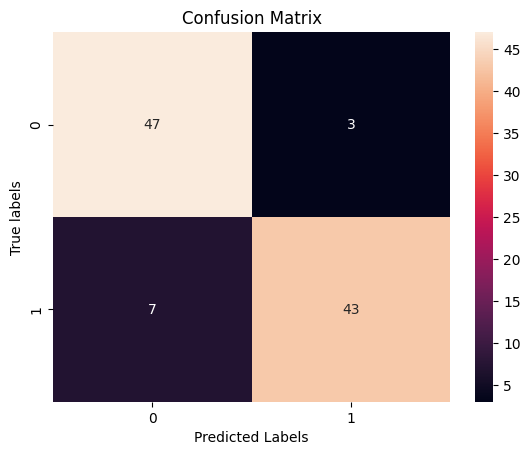

In [24]:
ax= plt.subplot()

sns.heatmap(cmws, annot=True, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["0","1"]); ax.yaxis.set_ticklabels(["0","1"]);

In [25]:
#With StandardScaling

scalerStandard = StandardScaler()
X_train_scalerStandard = scalerStandard.fit_transform(X_train)
X_test_scalerStandard = scalerStandard.transform(X_test)

wss = GaussianNB()
wss.fit(X_train_scalerStandard, y_train)
predict_ySS = wss.predict(X_test_scalerStandard)

print(f'Accuracy Score: {(accuracy_score(predict_ySS, y_test)*100)}')

Accuracy Score: 90.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#Classification Report for Naïve Bayes With StandardScaling
predict_yCRSS = wss.predict(X_test_scalerStandard)
cr = classification_report(y_test,predict_yCRSS)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.93      0.86      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [27]:
#Confusion Matrix for Naïve Bayes With StandardScaling
cmss = confusion_matrix(y_test,predict_yCRSS)
print(cmss)

[[47  3]
 [ 7 43]]


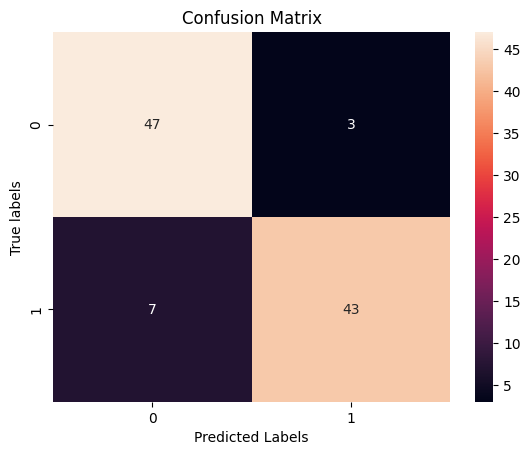

In [28]:
ax= plt.subplot()

sns.heatmap(cmss, annot=True, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["0","1"]); ax.yaxis.set_ticklabels(["0","1"]);

In [29]:
#With MinMaxScaling

scalerMinMax = MinMaxScaler()
X_train_scalerMinMax = scalerMinMax.fit_transform(X_train)
X_test_scalerMinMax = scalerMinMax.transform(X_test)

wmm = GaussianNB()
wmm.fit(X_train_scalerMinMax, y_train)
predict_yMM = wmm.predict(X_test_scalerMinMax)

print(f'Accuracy Score: {(accuracy_score(predict_yMM, y_test)*100)}')

Accuracy Score: 90.0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
#Classification Report for Naïve Bayes With MinMaxScaling
predict_yCRMM = wmm.predict(X_test_scalerMinMax)
cr = classification_report(y_test,predict_yCRMM)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        50
           1       0.93      0.86      0.90        50

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [31]:
#Confusion Matrix for Naïve Bayes With MinMaxScaling
cmmm = confusion_matrix(y_test,predict_yCRMM)
print(cmmm)

[[47  3]
 [ 7 43]]


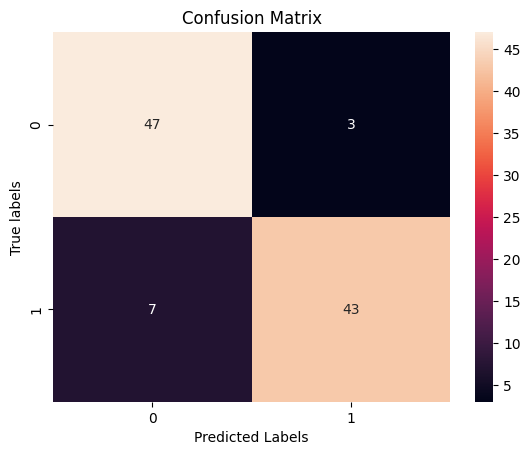

In [32]:
ax= plt.subplot()

sns.heatmap(cmmm, annot=True, ax=ax);

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

ax.xaxis.set_ticklabels(["0","1"]); ax.yaxis.set_ticklabels(["0","1"]);

## Construct Neural Network

In [33]:
# normalize inputs
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train
X_test = X_test

In [34]:
# Create a fully connected Neural Network

#Initialize constructor
model = Sequential()


#Input layer
model.add(Flatten(input_shape=(16,)))

#Hidden layer
model.add(Dense(10, activation='relu'))

#Output layer
model.add(Dense(1, activation='sigmoid'))


#optimizer can be SGD and you can specify the learning rate (step size)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [35]:
checkpoint = ModelCheckpoint('NN_mnist{epoch:02d}.h5')
epochs = 10

# Fit the model, verbose to false to avoid display of the progress
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=128, callbacks =[checkpoint])

#Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0) #model weights at the end of 10 epochs
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.4f" % (scores[0]))

Epoch 1/10
2/2 [==============================] - 1s 210ms/step - loss: 76.4362 - accuracy: 0.4961 - val_loss: 87.1774 - val_accuracy: 0.3906
Epoch 2/10
2/2 [==============================] - 0s 38ms/step - loss: 70.4823 - accuracy: 0.4961 - val_loss: 80.2866 - val_accuracy: 0.3906
Epoch 3/10
2/2 [==============================] - 0s 35ms/step - loss: 64.8117 - accuracy: 0.4961 - val_loss: 73.3578 - val_accuracy: 0.3906
Epoch 4/10
2/2 [==============================] - 0s 40ms/step - loss: 59.0803 - accuracy: 0.4961 - val_loss: 66.4152 - val_accuracy: 0.3906
Epoch 5/10
1/2 [==============>...............] - ETA: 0s - loss: 45.1653 - accuracy: 0.5859

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 38ms/step - loss: 53.0841 - accuracy: 0.4961 - val_loss: 59.5063 - val_accuracy: 0.3906
Epoch 6/10
2/2 [==============================] - 0s 40ms/step - loss: 47.5731 - accuracy: 0.4961 - val_loss: 52.5586 - val_accuracy: 0.3906
Epoch 7/10
2/2 [==============================] - 0s 35ms/step - loss: 41.9079 - accuracy: 0.4961 - val_loss: 45.5967 - val_accuracy: 0.3906
Epoch 8/10
2/2 [==============================] - 0s 35ms/step - loss: 36.0856 - accuracy: 0.4961 - val_loss: 38.6420 - val_accuracy: 0.3906
Epoch 9/10
2/2 [==============================] - 0s 35ms/step - loss: 30.4354 - accuracy: 0.4961 - val_loss: 31.6716 - val_accuracy: 0.3906
Epoch 10/10
2/2 [==============================] - 0s 35ms/step - loss: 24.5485 - accuracy: 0.4922 - val_loss: 24.8989 - val_accuracy: 0.3594
Accuracy: 48.00%
Loss: 16.9749


The accuracy for Naïve Bayes is 90% while Neural Network has an accuracy of 48%. Therefore more training is needed to increase the accuracy

In [36]:
#Check to see if scaled Neural Networks improve accuracy

#StandardScalar
historySS = model.fit(X_train_scalerStandard, y_train, validation_split=0.2, epochs=epochs, batch_size=128, callbacks =[checkpoint])
scoresSS = model.evaluate(X_test_scalerStandard, y_test, verbose=0) #model weights at the end of 10 epochs
print("Accuracy: %.2f%%" % (scoresSS[1]*100))
print("Loss: %.4f" % (scoresSS[0]))

Epoch 1/10
2/2 [==============================] - 0s 124ms/step - loss: 0.9305 - accuracy: 0.3594 - val_loss: 0.9663 - val_accuracy: 0.4062
Epoch 2/10
2/2 [==============================] - 0s 99ms/step - loss: 0.9263 - accuracy: 0.3672 - val_loss: 0.9577 - val_accuracy: 0.4062
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.8938 - accuracy: 0.4141

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 79ms/step - loss: 0.9202 - accuracy: 0.3672 - val_loss: 0.9483 - val_accuracy: 0.3906
Epoch 4/10
2/2 [==============================] - 0s 152ms/step - loss: 0.9134 - accuracy: 0.3789 - val_loss: 0.9382 - val_accuracy: 0.3906
Epoch 5/10
2/2 [==============================] - 0s 60ms/step - loss: 0.9064 - accuracy: 0.3789 - val_loss: 0.9277 - val_accuracy: 0.3906
Epoch 6/10
2/2 [==============================] - 0s 115ms/step - loss: 0.8992 - accuracy: 0.3750 - val_loss: 0.9171 - val_accuracy: 0.3906
Epoch 7/10
2/2 [==============================] - 0s 114ms/step - loss: 0.8911 - accuracy: 0.3711 - val_loss: 0.9065 - val_accuracy: 0.3906
Epoch 8/10
2/2 [==============================] - 0s 63ms/step - loss: 0.8830 - accuracy: 0.3750 - val_loss: 0.8962 - val_accuracy: 0.4219
Epoch 9/10
2/2 [==============================] - 0s 76ms/step - loss: 0.8759 - accuracy: 0.3750 - val_loss: 0.8857 - val_accuracy: 0.4062
Epoch 10/10
2/2 [==================

In [37]:
#MinMax
historyMM = model.fit(X_train_scalerMinMax, y_train, validation_split=0.2, epochs=epochs, batch_size=128, callbacks =[checkpoint])
scoresMM = model.evaluate(X_test_scalerMinMax, y_test, verbose=0) #model weights at the end of 10 epochs
print("Accuracy: %.2f%%" % (scoresMM[1]*100))
print("Loss: %.4f" % (scoresMM[0]))

Epoch 1/10
2/2 [==============================] - 0s 157ms/step - loss: 0.7191 - accuracy: 0.4844 - val_loss: 0.7120 - val_accuracy: 0.4531
Epoch 2/10
2/2 [==============================] - 0s 74ms/step - loss: 0.7188 - accuracy: 0.4844 - val_loss: 0.7109 - val_accuracy: 0.4531
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.7014 - accuracy: 0.5156

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 98ms/step - loss: 0.7186 - accuracy: 0.4961 - val_loss: 0.7100 - val_accuracy: 0.4531
Epoch 4/10
2/2 [==============================] - 0s 103ms/step - loss: 0.7183 - accuracy: 0.4883 - val_loss: 0.7093 - val_accuracy: 0.4688
Epoch 5/10
2/2 [==============================] - 0s 125ms/step - loss: 0.7179 - accuracy: 0.4883 - val_loss: 0.7086 - val_accuracy: 0.4844
Epoch 6/10
2/2 [==============================] - 0s 123ms/step - loss: 0.7177 - accuracy: 0.4805 - val_loss: 0.7081 - val_accuracy: 0.4844
Epoch 7/10
2/2 [==============================] - 0s 100ms/step - loss: 0.7174 - accuracy: 0.4844 - val_loss: 0.7075 - val_accuracy: 0.4844
Epoch 8/10
2/2 [==============================] - 0s 136ms/step - loss: 0.7170 - accuracy: 0.4883 - val_loss: 0.7071 - val_accuracy: 0.4844
Epoch 9/10
2/2 [==============================] - 0s 104ms/step - loss: 0.7167 - accuracy: 0.4883 - val_loss: 0.7067 - val_accuracy: 0.4844
Epoch 10/10
2/2 [===============

The accuracy for Naïve Bayes is 90%

The unscaled Neural Network has an accuracy of 48%

The StandardScalar Neural Network has an accuracy of 40%

The MinMaxScalar Neural Network has an accuracy of 41%

To train the Neural Network to improve its accuracy, I would use unscaled Neural Network to train

## Train Neural Network

In [43]:
#Increase epochs
epochs = 450

# #increase batch size
history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=768, callbacks =[checkpoint])
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Loss: %.4f" % (scores[0]))

Epoch 1/450
1/1 [==============================] - 0s 95ms/step - loss: 0.2769 - accuracy: 0.8711 - val_loss: 0.2861 - val_accuracy: 0.8750
Epoch 2/450
1/1 [==============================] - 0s 42ms/step - loss: 0.2768 - accuracy: 0.8711 - val_loss: 0.2861 - val_accuracy: 0.8750
Epoch 3/450
1/1 [==============================] - 0s 42ms/step - loss: 0.2767 - accuracy: 0.8711 - val_loss: 0.2860 - val_accuracy: 0.8750
Epoch 4/450
1/1 [==============================] - 0s 42ms/step - loss: 0.2766 - accuracy: 0.8711 - val_loss: 0.2860 - val_accuracy: 0.8750
Epoch 5/450
1/1 [==============================] - 0s 47ms/step - loss: 0.2765 - accuracy: 0.8711 - val_loss: 0.2859 - val_accuracy: 0.8750


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 6/450
1/1 [==============================] - 0s 41ms/step - loss: 0.2764 - accuracy: 0.8711 - val_loss: 0.2858 - val_accuracy: 0.8750
Epoch 7/450
1/1 [==============================] - 0s 41ms/step - loss: 0.2763 - accuracy: 0.8711 - val_loss: 0.2858 - val_accuracy: 0.8750
Epoch 8/450
1/1 [==============================] - 0s 42ms/step - loss: 0.2762 - accuracy: 0.8711 - val_loss: 0.2857 - val_accuracy: 0.8750
Epoch 9/450
1/1 [==============================] - 0s 41ms/step - loss: 0.2761 - accuracy: 0.8711 - val_loss: 0.2857 - val_accuracy: 0.8750
Epoch 10/450
1/1 [==============================] - 0s 39ms/step - loss: 0.2760 - accuracy: 0.8711 - val_loss: 0.2856 - val_accuracy: 0.8750
Epoch 11/450
1/1 [==============================] - 0s 40ms/step - loss: 0.2760 - accuracy: 0.8711 - val_loss: 0.2856 - val_accuracy: 0.8750
Epoch 12/450
1/1 [==============================] - 0s 41ms/step - loss: 0.2759 - accuracy: 0.8711 - val_loss: 0.2855 - val_accuracy: 0.8750
Epoch 13/450
1/1 

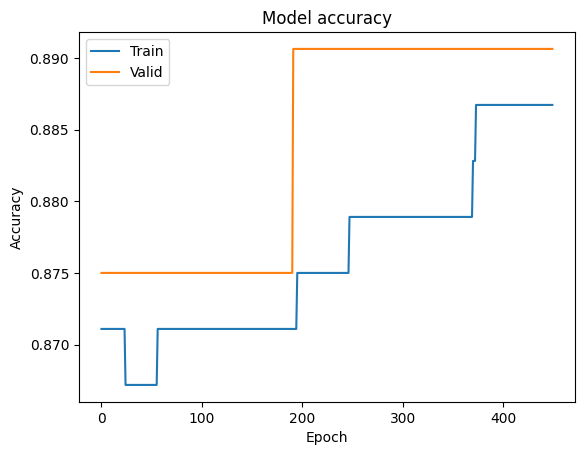

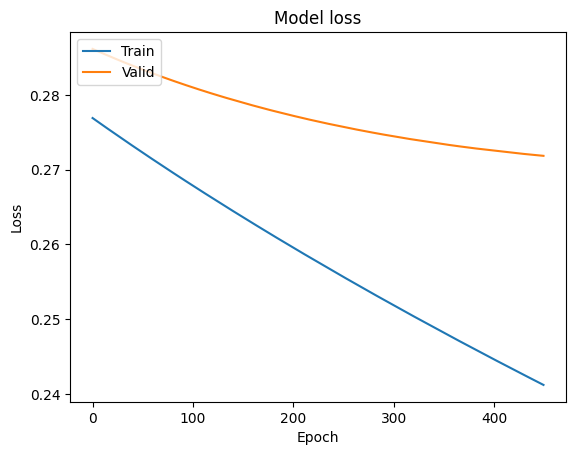

In [44]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# # Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

Increasing the epochs and the batch size will help to improve the Neural Network Algorithm